In [1]:
#importing necessary libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [2]:
#loads the submit_data from Github

FakeUrl = 'https://raw.githubusercontent.com/SushruthDt/TEAM_D_data606/main/FakeNews_data/Fake.csv'
fake = pd.read_csv(FakeUrl)
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


## 1.0 Importing Libraries 

In [3]:
#loads the test_data from Github 

true_url = 'https://raw.githubusercontent.com/SushruthDt/TEAM_D_data606/main/FakeNews_data/True.csv'
true = pd.read_csv(true_url)
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
# Adding target variable 
fake['Target']=1
true['Target']=0

## 2.0 Loading Dataset

In [5]:
# concatinating both the data set 
frames = [fake, true]
df = pd.concat(frames)
df.sample(10)

,title,text,subject,date,Target
10699,PRESIDENT TRUMP’S REMARKS at Ford’s Theatre Ga...,PRESIDENT TRUMP and FIRST LADY MELANIA TRUMP a...,politics,"Jun 4, 2017",1
9572,Republican Senator Hatch endorses Trump after ...,WASHINGTON (Reuters) - U.S. Senator Orrin Hatc...,politicsNews,"May 12, 2016",0
11916,Turkey's Erdogan says will take Jerusalem reso...,ISTANBUL (Reuters) - Turkey will take the reso...,worldnews,"December 19, 2017",0
12015,HOLLYWOOD HYPOCRITES: These Lefty Celebs Play ...,J-Lo was sorry. She didn t mean to sing Happy...,politics,"Jan 2, 2017",1
13312,"Coalition with Merkel not automatic, all optio...",BERLIN (Reuters) - The leader of Germany s Soc...,worldnews,"December 1, 2017",0
3762,Donald Trump Openly ADMITS To America He Has ...,Admitting to the United States something most ...,News,"November 18, 2016",1
9938,U.S. lawmakers target May 1 for Puerto Rico de...,WASHINGTON (Reuters) - The Republican and Demo...,politicsNews,"April 14, 2016",0
15144,BREAKING: Pope Met Privately With Enemy Of Lef...,Is the Pope s defense of same sex marriage the...,politics,"Sep 29, 2015",1
12516,BLACK AMERICAN On How I Became A Republican: “...,***WARNING***GRAPHIC LanguageThis video contai...,politics,"Nov 3, 2016",1
2401,Wisconsin to consider $3 billion Foxconn incen...,WASHINGTON (Reuters) - The Wisconsin governor ...,politicsNews,"July 31, 2017",0


In [6]:
df[df.index.duplicated()] # checking for duplicate index 

,title,text,subject,date,Target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [7]:
df.reset_index(inplace=True) # resetting the duplicate indexes


In [8]:
df[df.index.duplicated()] # rechecking again for dups indexs

,index,title,text,subject,date,Target


-------------
## 3.0 Explonatory Data Analysis on Train Data
------------------


In [9]:
df.shape  #size of the dataset

(44898, 6)

### 3.1 DataType Check

In [10]:
df.info() #consise summary of df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    44898 non-null  int64 
 1   title    44898 non-null  object
 2   text     44898 non-null  object
 3   subject  44898 non-null  object
 4   date     44898 non-null  object
 5   Target   44898 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.1+ MB


In [11]:
df.dtypes  #datatype of each column in train_data

index       int64
title      object
text       object
subject    object
date       object
Target      int64
dtype: object

**Observation - Datatypes of columns are as expected. No need to change data type**

### 3.2 Check for NULL Values

In [12]:
df.isnull().sum() #looking for null values

index      0
title      0
text       0
subject    0
date       0
Target     0
dtype: int64

<AxesSubplot:>

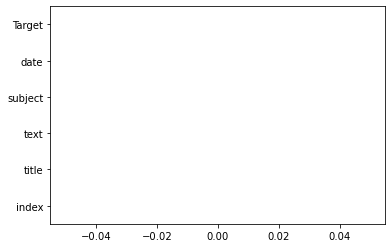

In [13]:
df.isnull().sum().plot(kind='barh') #Bar graph that shows the number of Null Values

### 3.3 Checking Data Distribution

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'News'),
  Text(1, 0, 'politics'),
  Text(2, 0, 'Government News'),
  Text(3, 0, 'left-news'),
  Text(4, 0, 'US_News'),
  Text(5, 0, 'Middle-east'),
  Text(6, 0, 'politicsNews'),
  Text(7, 0, 'worldnews')])

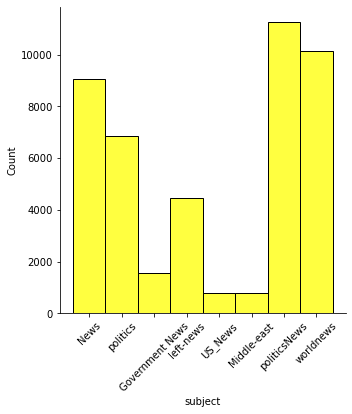

In [14]:
sns.displot(df, x="subject", binwidth=3, color = 'yellow')
plt.xticks(rotation=45)

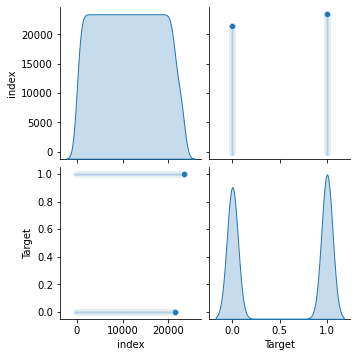

In [15]:
sns.pairplot(df,diag_kind = 'kde') #relationship in  dataset

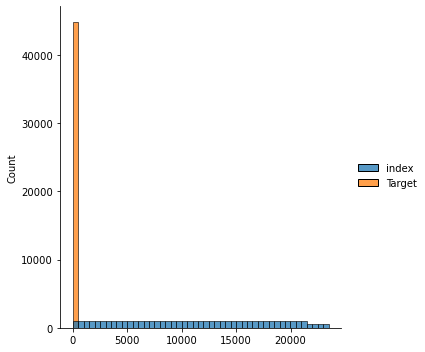

In [16]:
sns.displot(df)

### 4.4 Descriptive Analysis

C:\Users\usrik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

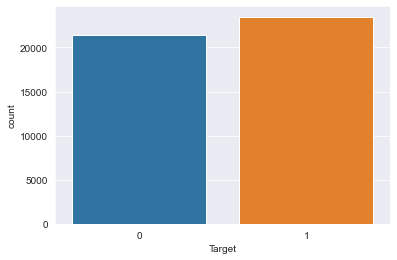

In [17]:
sns.set_style("darkgrid")
sns.countplot(df.Target)

[Text(0, 0, 'News'),
 Text(1, 0, 'politics'),
 Text(2, 0, 'Government News'),
 Text(3, 0, 'left-news'),
 Text(4, 0, 'US_News'),
 Text(5, 0, 'Middle-east'),
 Text(6, 0, 'politicsNews'),
 Text(7, 0, 'worldnews')]

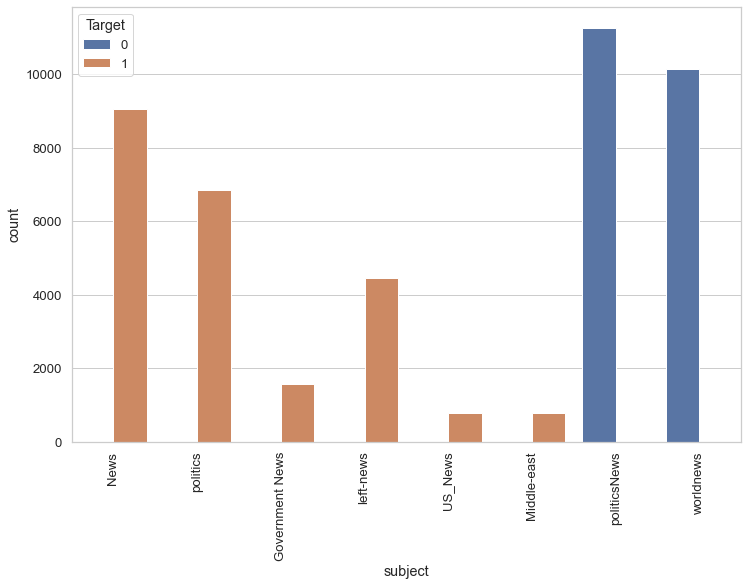

In [18]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "subject", hue = "Target" , data = df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

SINCE THE TOPICS IN SUBJECT COLUMN ARE DIFFERENT FOR BOTH CATEGORIES, HENCE WE HAVE TO EXCLUDE IT FROM FINAL TEXT COLUMN

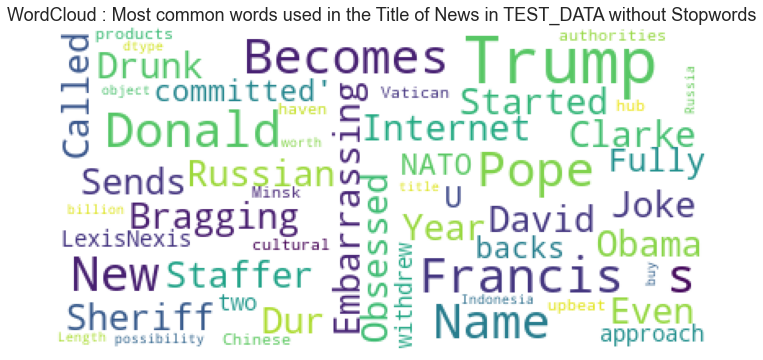

In [19]:
#Text Pre-processing

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df['title']))

plt.figure(figsize=(15,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('WordCloud : Most common words used in the Title of News in TEST_DATA without Stopwords', fontsize=18)
plt.show() #Wordcloud without Stopwords

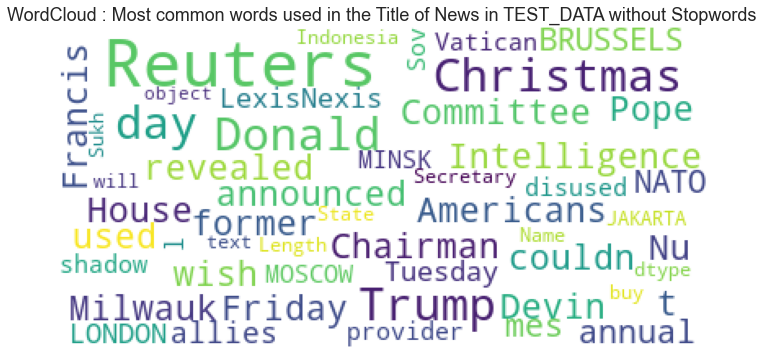

In [20]:
#Text Pre-processing

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df['text']))

plt.figure(figsize=(15,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('WordCloud : Most common words used in the Title of News in TEST_DATA without Stopwords', fontsize=18)
plt.show() #Wordcloud without Stopwords

C:\Users\usrik\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\usrik\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\usrik\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\usrik\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\usrik\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

Text(0.5, 0.98, 'Average word length in each text')

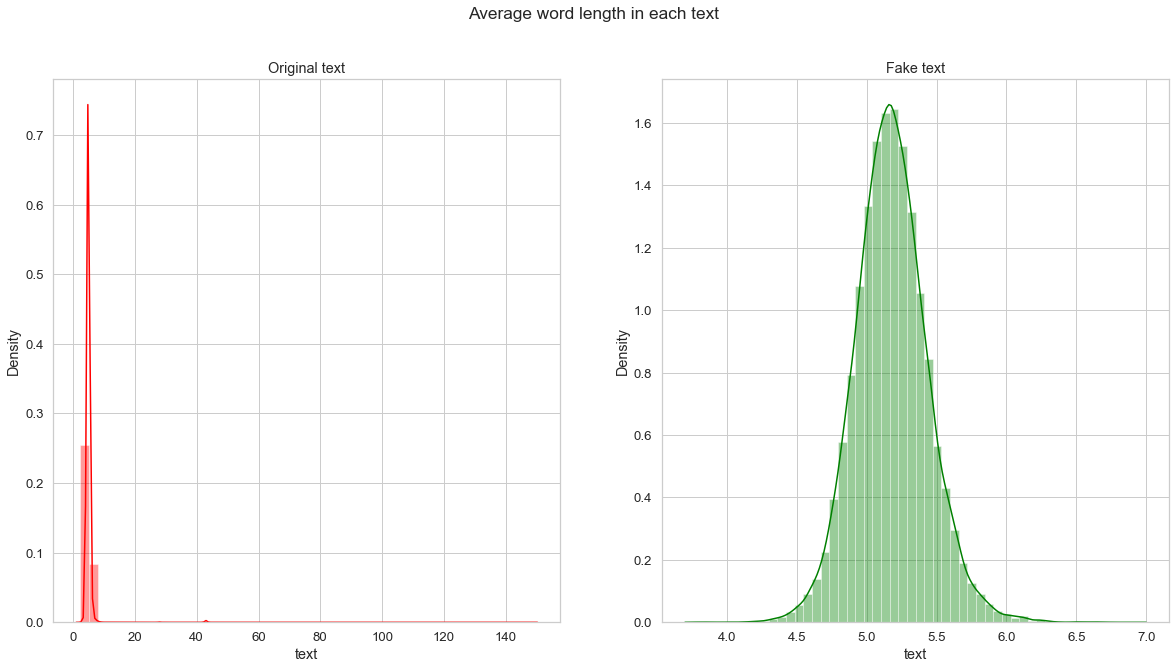

In [21]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df[df['Target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Original text')
word=df[df['Target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')

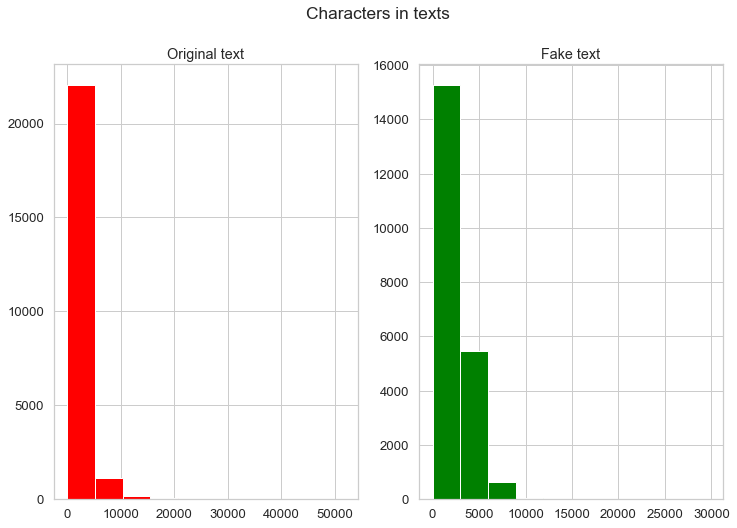

In [22]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['Target']==1]['text'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df[df['Target']==0]['text'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Characters in texts')
plt.show()

The distribution of both seems to be a bit different. 2500 characters in text is the most common in original text category while around 5000 characters in text are most common in fake text category.

-------------
## 5.0 Text Processing
------------------


In [23]:
df['content'] = df['title'] + " " + df['text']
print(df['content'])

0         Donald Trump Sends Out Embarrassing New Year’...
1         Drunk Bragging Trump Staffer Started Russian ...
2         Sheriff David Clarke Becomes An Internet Joke...
3         Trump Is So Obsessed He Even Has Obama’s Name...
4         Pope Francis Just Called Out Donald Trump Dur...
                               ...                        
44893    'Fully committed' NATO backs new U.S. approach...
44894    LexisNexis withdrew two products from Chinese ...
44895    Minsk cultural hub becomes haven from authorit...
44896    Vatican upbeat on possibility of Pope Francis ...
44897    Indonesia to buy $1.14 billion worth of Russia...
Name: content, Length: 44898, dtype: object


In [24]:
df.drop(["date"],axis=1,inplace=True)
df.drop(["subject"],axis=1,inplace=True)
df

,index,title,text,Target,content
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1,Donald Trump Sends Out Embarrassing New Year’...
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1,Drunk Bragging Trump Staffer Started Russian ...
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1,Sheriff David Clarke Becomes An Internet Joke...
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1,Trump Is So Obsessed He Even Has Obama’s Name...
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1,Pope Francis Just Called Out Donald Trump Dur...
...,...,...,...,...,...
44893,21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0,'Fully committed' NATO backs new U.S. approach...
44894,21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",0,LexisNexis withdrew two products from Chinese ...
44895,21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,0,Minsk cultural hub becomes haven from authorit...
44896,21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,0,Vatican upbeat on possibility of Pope Francis ...


In [25]:
#Convert the text to lowercase:
df["content"] = df["content"].apply(lambda x: x.lower())
df

,index,title,text,Target,content
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1,donald trump sends out embarrassing new year’...
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1,drunk bragging trump staffer started russian ...
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1,sheriff david clarke becomes an internet joke...
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1,trump is so obsessed he even has obama’s name...
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1,pope francis just called out donald trump dur...
...,...,...,...,...,...
44893,21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0,'fully committed' nato backs new u.s. approach...
44894,21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",0,lexisnexis withdrew two products from chinese ...
44895,21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,0,minsk cultural hub becomes haven from authorit...
44896,21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,0,vatican upbeat on possibility of pope francis ...


In [26]:
#Remove punctuation:
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
df["content"] = df["content"].apply(punctuation_removal)
df

,index,title,text,Target,content
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1,donald trump sends out embarrassing new year’...
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1,drunk bragging trump staffer started russian ...
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1,sheriff david clarke becomes an internet joke...
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1,trump is so obsessed he even has obama’s name...
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1,pope francis just called out donald trump dur...
...,...,...,...,...,...
44893,21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0,fully committed nato backs new us approach on ...
44894,21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",0,lexisnexis withdrew two products from chinese ...
44895,21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,0,minsk cultural hub becomes haven from authorit...
44896,21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,0,vatican upbeat on possibility of pope francis ...


In [27]:
#Remove stopwords:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df["content"] = df["content"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\usrik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,index,title,text,Target,content
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1,donald trump sends embarrassing new year’s eve...
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1,drunk bragging trump staffer started russian c...
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1,sheriff david clarke becomes internet joke thr...
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1,trump obsessed even obama’s name coded website...
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1,pope francis called donald trump christmas spe...
...,...,...,...,...,...
44893,21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0,fully committed nato backs new us approach afg...
44894,21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",0,lexisnexis withdrew two products chinese marke...
44895,21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,0,minsk cultural hub becomes authorities minsk r...
44896,21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,0,vatican upbeat possibility pope francis visiti...


In [28]:
#Tokenization
"""
from nltk.tokenize import TweetTokenizer
tt = TweetTokenizer()
df['content']=df["content"].apply(tt.tokenize)
df['content'].head()
df
"""
import nltk
import pandas as pd
nltk.download('punkt')
  

sentences = df['content']

# remove anything but characters and spaces
sentences = sentences.str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
print(sentences)

splitwords = [ nltk.word_tokenize( str(sentence) ) for sentence in sentences ]
print(splitwords)
    # output: [['This', 'is', 'a', 'very', 'good', 'site', 'I', 'will', 'recommend', 'it', 'to', 'others'], ['Can', 'you', 'please', 'give', 'me', 'a', 'call', 'at', 'have', 'issues', 'with', 'the', 'listings'], ['good', 'work', 'keep', 'it', 'up'], ['not', 'a', 'very', 'helpful', 'site', 'in', 'finding', 'home', 'decor']]
"""
wordcounts = [ len(words) for words in splitwords ]
print(wordcounts)
    # output: [12, 13, 5, 9]

wordcounts2 = [ sentence.count(' ') + 1 for sentence in sentences ]
print(wordcounts2)
    # output: [12, 13, 5, 9]

    """
  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\usrik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0        donald trump sends embarrassing new years eve ...
1        drunk bragging trump staffer started russian c...
2        sheriff david clarke becomes internet joke thr...
3        trump obsessed even obamas name coded website ...
4        pope francis called donald trump christmas spe...
                               ...                        
44893    fully committed nato backs new us approach afg...
44894    lexisnexis withdrew two products chinese marke...
44895    minsk cultural hub becomes authorities minsk r...
44896    vatican upbeat possibility pope francis visiti...
44897    indonesia buy billion worth russian jets jakar...
Name: content, Length: 44898, dtype: object


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



"\nwordcounts = [ len(words) for words in splitwords ]\nprint(wordcounts)\n    # output: [12, 13, 5, 9]\n\nwordcounts2 = [ sentence.count(' ') + 1 for sentence in sentences ]\nprint(wordcounts2)\n    # output: [12, 13, 5, 9]\n\n    "

In [29]:
## visualisation
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

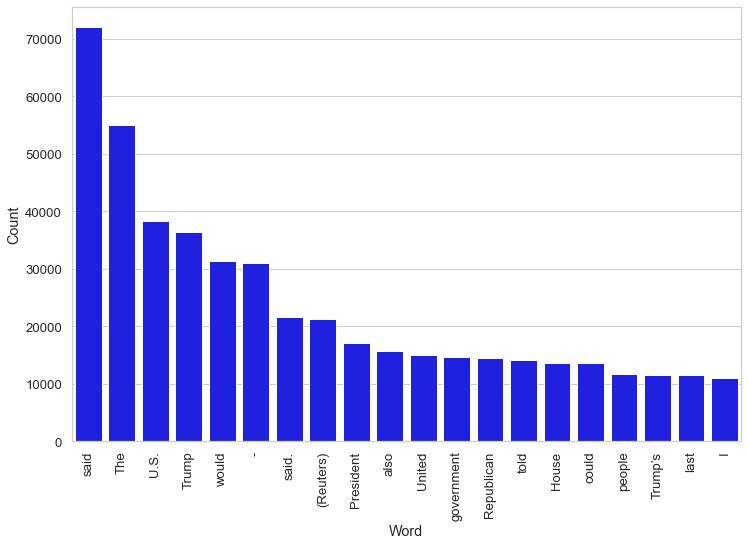

In [30]:
stop = stopwords.words('english')
df["text"] = df["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# Most frequent words in fake news
counter(df[df["Target"] == 0], "text", 20)


In [ ]:
stop = stopwords.words('english')
df["text"] = df["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# Most frequent words in fake news
counter(df[df["Target"] == 1], "text", 20)


In [ ]:
# trying Ngrams
import re
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]


In [ ]:
nltk.download('wordnet')
true_word = basic_clean(''.join(str(true['text'].tolist())))

In [ ]:
true_bigrams_series = (pd.Series(nltk.ngrams(true_word, 2)).value_counts())[:20]

In [ ]:
true_bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

In [ ]:
true_trigrams_series = (pd.Series(nltk.ngrams(true_word, 3)).value_counts())[:20]
true_trigrams_series.sort_values().plot.barh(color='red', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')